In [1]:

####################################################################################################
####################################################################################################

import sys
import os

import datetime
import matplotlib.pyplot as plt
import numpy as np
import numba
import pandas as pd
import pprint

from IPython.display import clear_output
from IPython.display import display

sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath("../pax"))

from pax_utils import event_utils
from pax_utils import file_utils
from pax_utils import interaction_utils
from pax_utils import s1s2_utils
from pax_utils import waveform_utils
from pax_utils import waveform_raw_utils
from pax_utils import waveform_pe_utils

from pax.configuration import load_configuration

pp = pprint.PrettyPrinter(depth=2)



In [4]:

####################################################################################################
####################################################################################################

f = plt.figure(figsize=(30, 15))

def processPklEvents(zipfilename):

    ################################################################################################
    ################################################################################################
    
    lst_pkl_files  = file_utils.getListOfPklFilesFromZipFile(zipfilename, nEventsPerFile)

    
    ################################################################################################
    ################################################################################################
    
    intr0  = None
    sum_wf = None
    event  = None

    df_zip_merged = pd.DataFrame()
    
        
    ################################################################################################
    ################################################################################################
    
    for iPklFile in range(0, len(lst_pkl_files)):
    
        ############################################################################################
        ############################################################################################

        print("File: '" + str(zipfilename) + "'")
        print("   event_number: " + str(iPklFile))
        #clear_output(wait=True)
        
        
        ############################################################################################
        ############################################################################################

        jsonfilename = os.path.dirname(zipfilename) + '/pax_info.json'
        print("   CFG: '" + str(jsonfilename) + "'")
        
        cfg = event_utils.getConfig(jsonfilename)
        
        
        ############################################################################################
        ############################################################################################
        
        pklfilename  = lst_pkl_files[iPklFile]
        event        = file_utils.getPaxEventFromPklFileInZipArchive(zipfilename, pklfilename)

        
        ############################################################################################
        ############################################################################################
        
        interactions  = event.interactions
        nInteractions = len(interactions)
        
        if (nInteractions != 1): continue
        
        
        ############################################################################################
        ############################################################################################

        intr0 = None
        
        if (len(interactions) > 0):
            
            intr0 = interactions[0]
            
            
        ############################################################################################
        ############################################################################################
        
        df_pkl_event  = event_utils.getEventDataFrameFromEvent(event)
        df_pkl_intr   = interaction_utils.getInteractionDataFrameFromEvent(event)
        df_pkl_s2s    = s1s2_utils.getS2integralsDataFrame(event, 127)
        df_pkl_merged = df_pkl_event.merge(df_pkl_intr).merge(df_pkl_s2s)
        df_zip_merged = df_zip_merged.append(df_pkl_merged)
        
              
        ############################################################################################
        # S2 Window from Event
        ############################################################################################
        
        left  = event.main_s2.left
        right = event.main_s2.right
        
    
        ############################################################################################
        # Raw Waveforms
        ############################################################################################
    
        #arr_summed_waveform_raw_evt = waveform_utils.getSummedWaveformFromEvent(event, 'tpc_raw')[left:right]
        #df_channels_waveforms_raw   = waveform_raw_utils.getChannelWaveformsDataFrameRaw(event, cfg)
        #arr_summed_waveform_raw_df  = waveform_raw_utils.getSummedWaveformFromDataFrame(df_channels_waveforms_raw, event)
        #arr_summed_waveform_raw_df  = arr_summed_waveform_raw_df[left:right]
        #
        #f = plt.figure(figsize=(10, 5))
        #plt.plot(arr_summed_waveform_raw_evt, color='b', label='Raw Summed Waveform from Event') 
        #plt.plot(arr_summed_waveform_raw_df , color='r', label='Raw Summed Waveform by Hand DF') 
        #plt.legend(fontsize=18)
        #
        #eq_raw = waveform_raw_utils.compareWaveforms(arr_summed_waveform_raw_evt, arr_summed_waveform_raw_df)
        #                                                                              
        #if (not eq_raw):
        #    
        #    raise Exception("Error! RAW Waveforms summed over channels by hand differ from event (DF).")
        #    
        #    return
    
        
        
        ############################################################################################
        # TPC Summed Waveform
        ############################################################################################
        
        arr_summed_waveform_tpc_evt = waveform_utils.getSummedWaveformFromEvent(event, 'tpc')[left:right]
        arr_summed_waveform_tpc_tst = waveform_pe_utils.getSummedWaveform(event, cfg)[left:right]
        df_channels_waveforms_tpc   = waveform_pe_utils.getChannelWaveformsDataFrameTpc(event, cfg)
        arr_summed_waveform_tpc_df  = waveform_pe_utils.getSummedWaveformFromDataFrame(df_channels_waveforms_tpc, event)
        arr_summed_waveform_tpc_df  = arr_summed_waveform_tpc_df[left:right]
        
        f = plt.figure(figsize=(10, 5))
        plt.plot(arr_summed_waveform_tpc_evt, color='b', label='TPC Summed Waveform from Event') 
        plt.plot(arr_summed_waveform_tpc_tst, color='g', label='TPC Summed Waveform from Test') 
        plt.plot(arr_summed_waveform_tpc_df , color='r', label='TPC Summed Waveform by Hand DF') 
        plt.legend(fontsize=18)
        
        eq_tpc0 = waveform_raw_utils.compareWaveforms(arr_summed_waveform_tpc_evt, arr_summed_waveform_tpc_tst)
        eq_tpc1 = waveform_raw_utils.compareWaveforms(arr_summed_waveform_tpc_evt, arr_summed_waveform_tpc_df)
                                                                                      
       
      
        #
        continue
        
    
               
                
        #############################################################################################
        ## Sanity
        #############################################################################################
#
        #event_sum_wf  = np.sum(evt_summed_waveform_top)
        #event_sum_s2s = np.sum(df_pkl_s2s.drop(columns=['event_number']).as_matrix(), axis=1) 
        #
        #print()
        #print("Event Sum Waveform: " + str(event_sum_wf))
        #print("Event Sum S2's:     " + str(event_sum_s2s))

       
    
        #############################################################################################
        #############################################################################################

        assert(18 == len(event.get_sum_waveform_names()))
        
        #for name in event.get_sum_waveform_names(): print(name)

            
        ############################################################################################
        ############################################################################################
    
        continue
            
    
    ################################################################################################
    ################################################################################################
    
    #plt.legend()
    
    df_zip_merged.reset_index(inplace=True, drop=True)
       
    return df_zip_merged, event, intr0, sum_wf

    

File: '../pax_run/pax_output/Mar25/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
   event_number: 0
   CFG: '../pax_run/pax_output/Mar25/instructions_000000/pax_info.json'
File: '../pax_run/pax_output/Mar25/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
   event_number: 1
   CFG: '../pax_run/pax_output/Mar25/instructions_000000/pax_info.json'

len(event.pulses):   400
len(all_hits):       875
len(hits_per_pulse): 369

channel 1 has pulses but is dead!
channel 2 has pulses but is dead!
channel 12 has pulses but is dead!
channel 26 has pulses but is dead!
channel 27 has pulses but is dead!
channel 34 has pulses but is dead!
channel 62 has pulses but is dead!
channel 65 has pulses but is dead!
channel 73 has pulses but is dead!
channel 79 has pulses but is dead!
channel 86 has pulses but is dead!
channel 88 has pulses but is dead!
channel 91 has pulses but is dead!
channel 102 has pulses but is dead!
channel 118 has pulses but is dead!
channel 130 has 

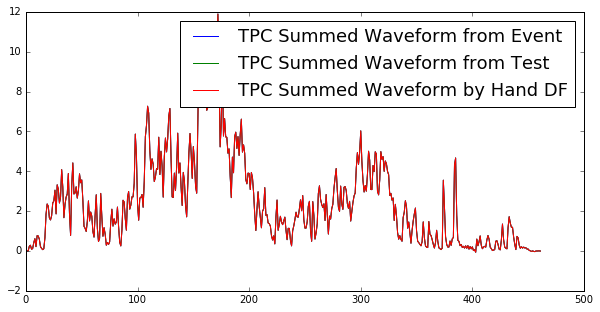

In [5]:

####################################################################################################
####################################################################################################

zipfilename    = '../pax_run/pax_output/Mar25/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
nEventsPerFile = 2


df_zip_merged, event, intr, wf_sum = processPklEvents(zipfilename)


    